# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [2]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10
matname = 'vanilla'

In [3]:
from shl_scripts.shl_experiments import SHL
help(SHL)

Help on class SHL in module shl_scripts.shl_experiments:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=13, datapath='database/', name_database='kodakdb', n_dictionary=441, learning_algorithm='mp', fit_tol=None, do_precision=False, do_mask=True, l0_sparseness=15, one_over_F=True, n_iter=8193, eta=0.003, beta1=0.9, beta2=0.999, epsilon=1e-08, homeo_method='HEH', eta_homeo=0.05, alpha_homeo=0.0, C=5.0, nb_quant=256, P_cum=None, do_sym=False, max_patches=4096, seed=42, patch_norm=False, batch_size=512, record_each=128, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', matname=None, P_cum=None, fit_tol=None, l0_sparseness=None)

In [4]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
data = shl.get_data(matname='data')

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (81920, 256) - done in 0.15s.


In [5]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.sum(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 256)
average of patches =  -2.4136250277210798e-05  +/-  0.04711906843621212
average energy of data =  9.349425596623442 +/- 9.185103022319515


In [6]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/vanilla_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   1 /   8193 (elapsed time:   1s,   0mn   1s)
Iteration  129 /   8193 (elapsed time:  117s,   1mn  57s)
Iteration  257 /   8193 (elapsed time:  241s,   4mn   1s)
Iteration  385 /   8193 (elapsed time:  351s,   5mn  51s)
Iteration  513 /   8193 (elapsed time:  459s,   7mn  39s)
Iteration  641 /   8193 (elapsed time:  565s,   9mn  25s)
Iteration  769 /   8193 (elapsed time:  666s,  11mn   6s)
Iteration  897 /   8193 (elapsed time:  757s,  12mn  37s)
Iteration  1025 /   8193 (elapsed time:  852s,  14mn  12s)
Iteration  1153 /   8193 (elapsed time:  950s,  15mn  50s)
Iteration  1281 /   8193 (elapsed time:  1049s,  17mn  29s)
Iteration  1409 /   8193 (elapsed time:  1138s,  18mn  58s)
Iteration  1537 /   8193 (elapsed time:  1247s,  20mn  47s)
Iteration  1665 /   8193 (elapsed time:  1382s,  23mn   2s)
Iteration  1793 /   8193 (elapsed time:  1526s,  

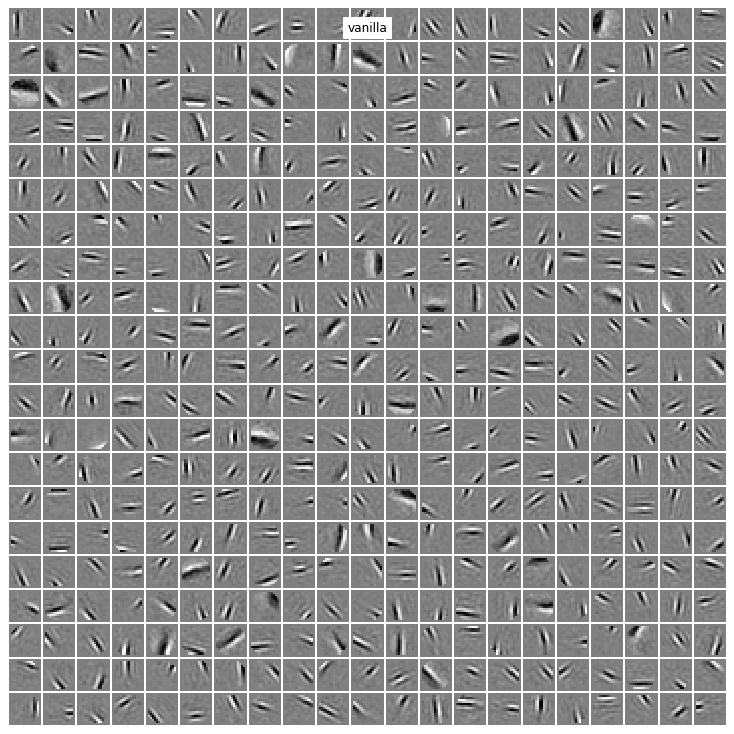

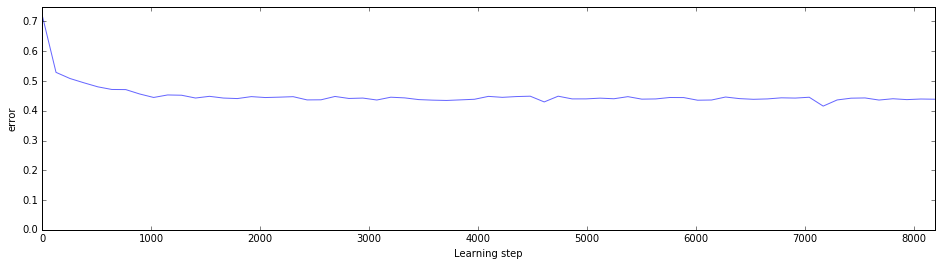

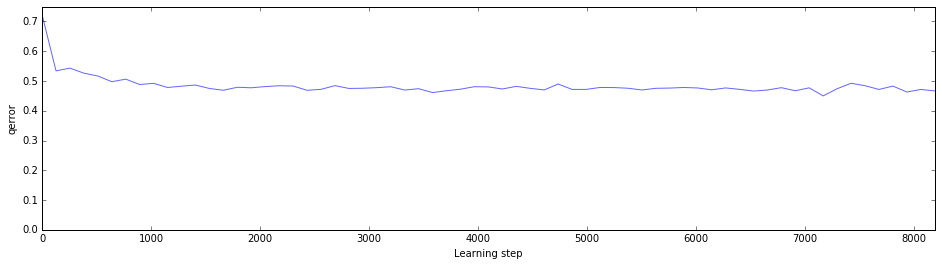

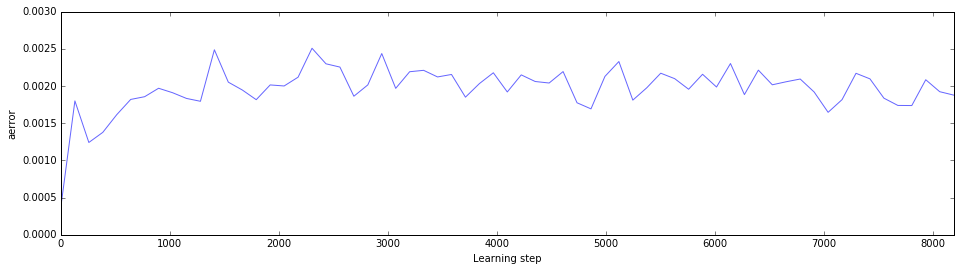

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_qerror', 'time_plot_aerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [8]:
help(dico)

Help on SparseHebbianLearning in module shl_scripts.shl_learn object:

class SparseHebbianLearning(builtins.object)
 |  Sparse Hebbian learning
 |  
 |  Finds a dictionary (a set of atoms) that can best be used to represent data
 |  using a sparse code.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_dictionary : int,
 |      Number of dictionary elements to extract
 |  
 |  eta : float or dict
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  n_iter : int,
 |      total number of iterations to perform
 |  
 |  eta_homeo : float
 |      Gives the learning parameter for the homeostatic gain.
 |  
 |  alpha_homeo : float
 |      Gives the smoothing exponent  for the homeostatic gain
 |      If equal to 1 the homeostatic learning rule learns a linear relation to
 |      variance.
 |  
 |  dictionary : array of shape (n_dictionary, n_pixels),
 |      initial value of the dictionary for warm restart scenarios
 |      Use ``None`` for a new learning.
 |  
 |  fit_algorith

In [9]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (441, 256)
average of filters =  5.568941744384986e-07 +/- 0.0031327037911685045
average energy of filters =  1.0 +/- 8.987519723156029e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [10]:
sparse_code = shl.code(data, dico, matname=matname, l0_sparseness=45)
print('number of codes, size of codewords = ', sparse_code.shape)
print('average of codewords = ', sparse_code.mean())
print('average energy of codewords = ', sparse_code.std(axis=0).mean())
print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

No cache found data_cache/vanilla_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp number of codes, size of codewords =  (81920, 441)
average of codewords =  0.10339797314795991
average energy of codewords =  0.5994897608937297
std of the average of individual patches =  0.013396632000430465


In [11]:
patches = sparse_code @ dico.dictionary
print('number of codes, size of reconstructed images = ', patches.shape)

number of codes, size of reconstructed images =  (81920, 256)


In [12]:
error = data - patches
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
SE = np.sqrt(np.sum(error**2, axis=1))
print('average energy of residual = ', SE.mean(), '+/-', SE.std())

average of residual patches =  0.0016991418747445027 +/- 0.019053938799978208
average energy of residual =  2.485696169025404 +/- 2.367275102584503


## Version used

In [13]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.5.2 64bit [GCC 5.4.0 20160609]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.14.0
shl_scripts 20171221
Tue Feb 13 13:08:29 2018 CET